## Importing Library and Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('diabetes_data_upload.csv')

In [3]:
data.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [4]:
data.shape

(520, 17)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

### About dataset
* **Age**
* **Gender**
* **Polyuria**, Excessive urination volume (or polyuria) occurs when you urinate more than normal. Urine volume is considered excessive if it equals more than 2.5 liters per day. A “normal” urine volume depends on your age and gender. However, less than 2 liters per day is usually considered normal
* **Polydipsia**, Polydipsia is the medical definition of excessive thirst. Excess thirst is an abnormal urge to drink fluids at all times. It's a reaction to fluid loss in your body
* **sudden weight loss**
* **weakness**
* **Polyphagia**, Polyphagia is a medical term describing excessive hunger or appetite. It also leads to a strong drive for overeating. People with polyphagia may not feel full after eating a large amount of food
* **Genital thrush**
* **visual blurring**
* **Itching**
* **Irritability**
* **delayed healing**
* **partial paresis**, Paresis describes weakness or partial paralysis
* **muscle stiffness**
* **Alopecia**, happens when the immune system attacks hair follicles and causes hair loss
* **Obesity**, abnormal or excessive fat accumulation that presents a risk to health
* **Class**, early diagnosis

## Preprocessing

### Eliminating missing data

In [6]:
data.isnull().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

so there is no missing value in our data

## Exploratory Data Analysis

### Univariate Analysis

#### Summary stats

In [7]:
summary_stats = data.describe()

# calculate each columns
mode_stats = data.mode()

# stat summary
summary_stats = pd.concat([summary_stats, mode_stats], axis=0)
summary_stats.index = summary_stats.index.tolist()[:-1] + ['mode']

print(summary_stats)

              Age Gender Polyuria Polydipsia sudden weight loss weakness  \
count  520.000000    NaN      NaN        NaN                NaN      NaN   
mean    48.028846    NaN      NaN        NaN                NaN      NaN   
std     12.151466    NaN      NaN        NaN                NaN      NaN   
min     16.000000    NaN      NaN        NaN                NaN      NaN   
25%     39.000000    NaN      NaN        NaN                NaN      NaN   
50%     47.500000    NaN      NaN        NaN                NaN      NaN   
75%     57.000000    NaN      NaN        NaN                NaN      NaN   
max     90.000000    NaN      NaN        NaN                NaN      NaN   
mode    35.000000   Male       No         No                 No      Yes   

      Polyphagia Genital thrush visual blurring Itching Irritability  \
count        NaN            NaN             NaN     NaN          NaN   
mean         NaN            NaN             NaN     NaN          NaN   
std          NaN       

#### Features distribution

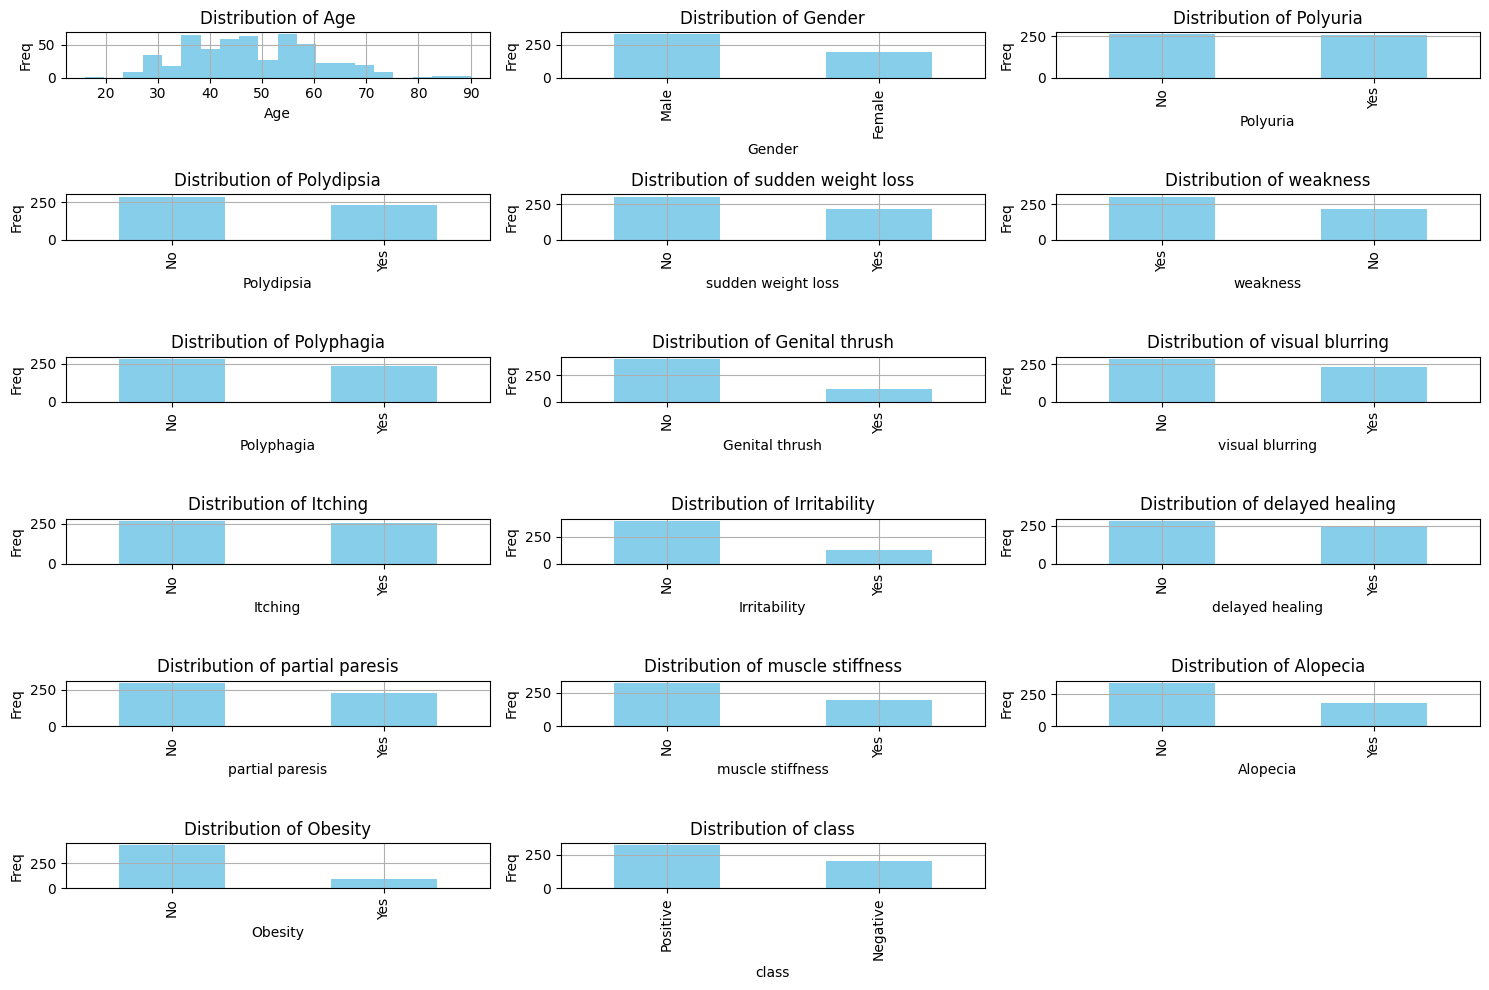

In [8]:
# arranging the viz layout
num_cols = 3 
num_rows = (len(data.columns) + num_cols - 1) // num_cols

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iteratting all columns
for i, column in enumerate(data.columns):
    if data[column].dtype == 'object':
        # categorical
        data[column].value_counts().plot(kind='bar', color='skyblue', ax=axes[i])
    else:
        # numerical
        data[column].plot(kind='hist', color='skyblue', bins=20, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Freq')
    axes[i].grid(True)

# Hiding empty plot
for j in range(len(data.columns), num_cols * num_rows):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()


### Bivariate Analysis

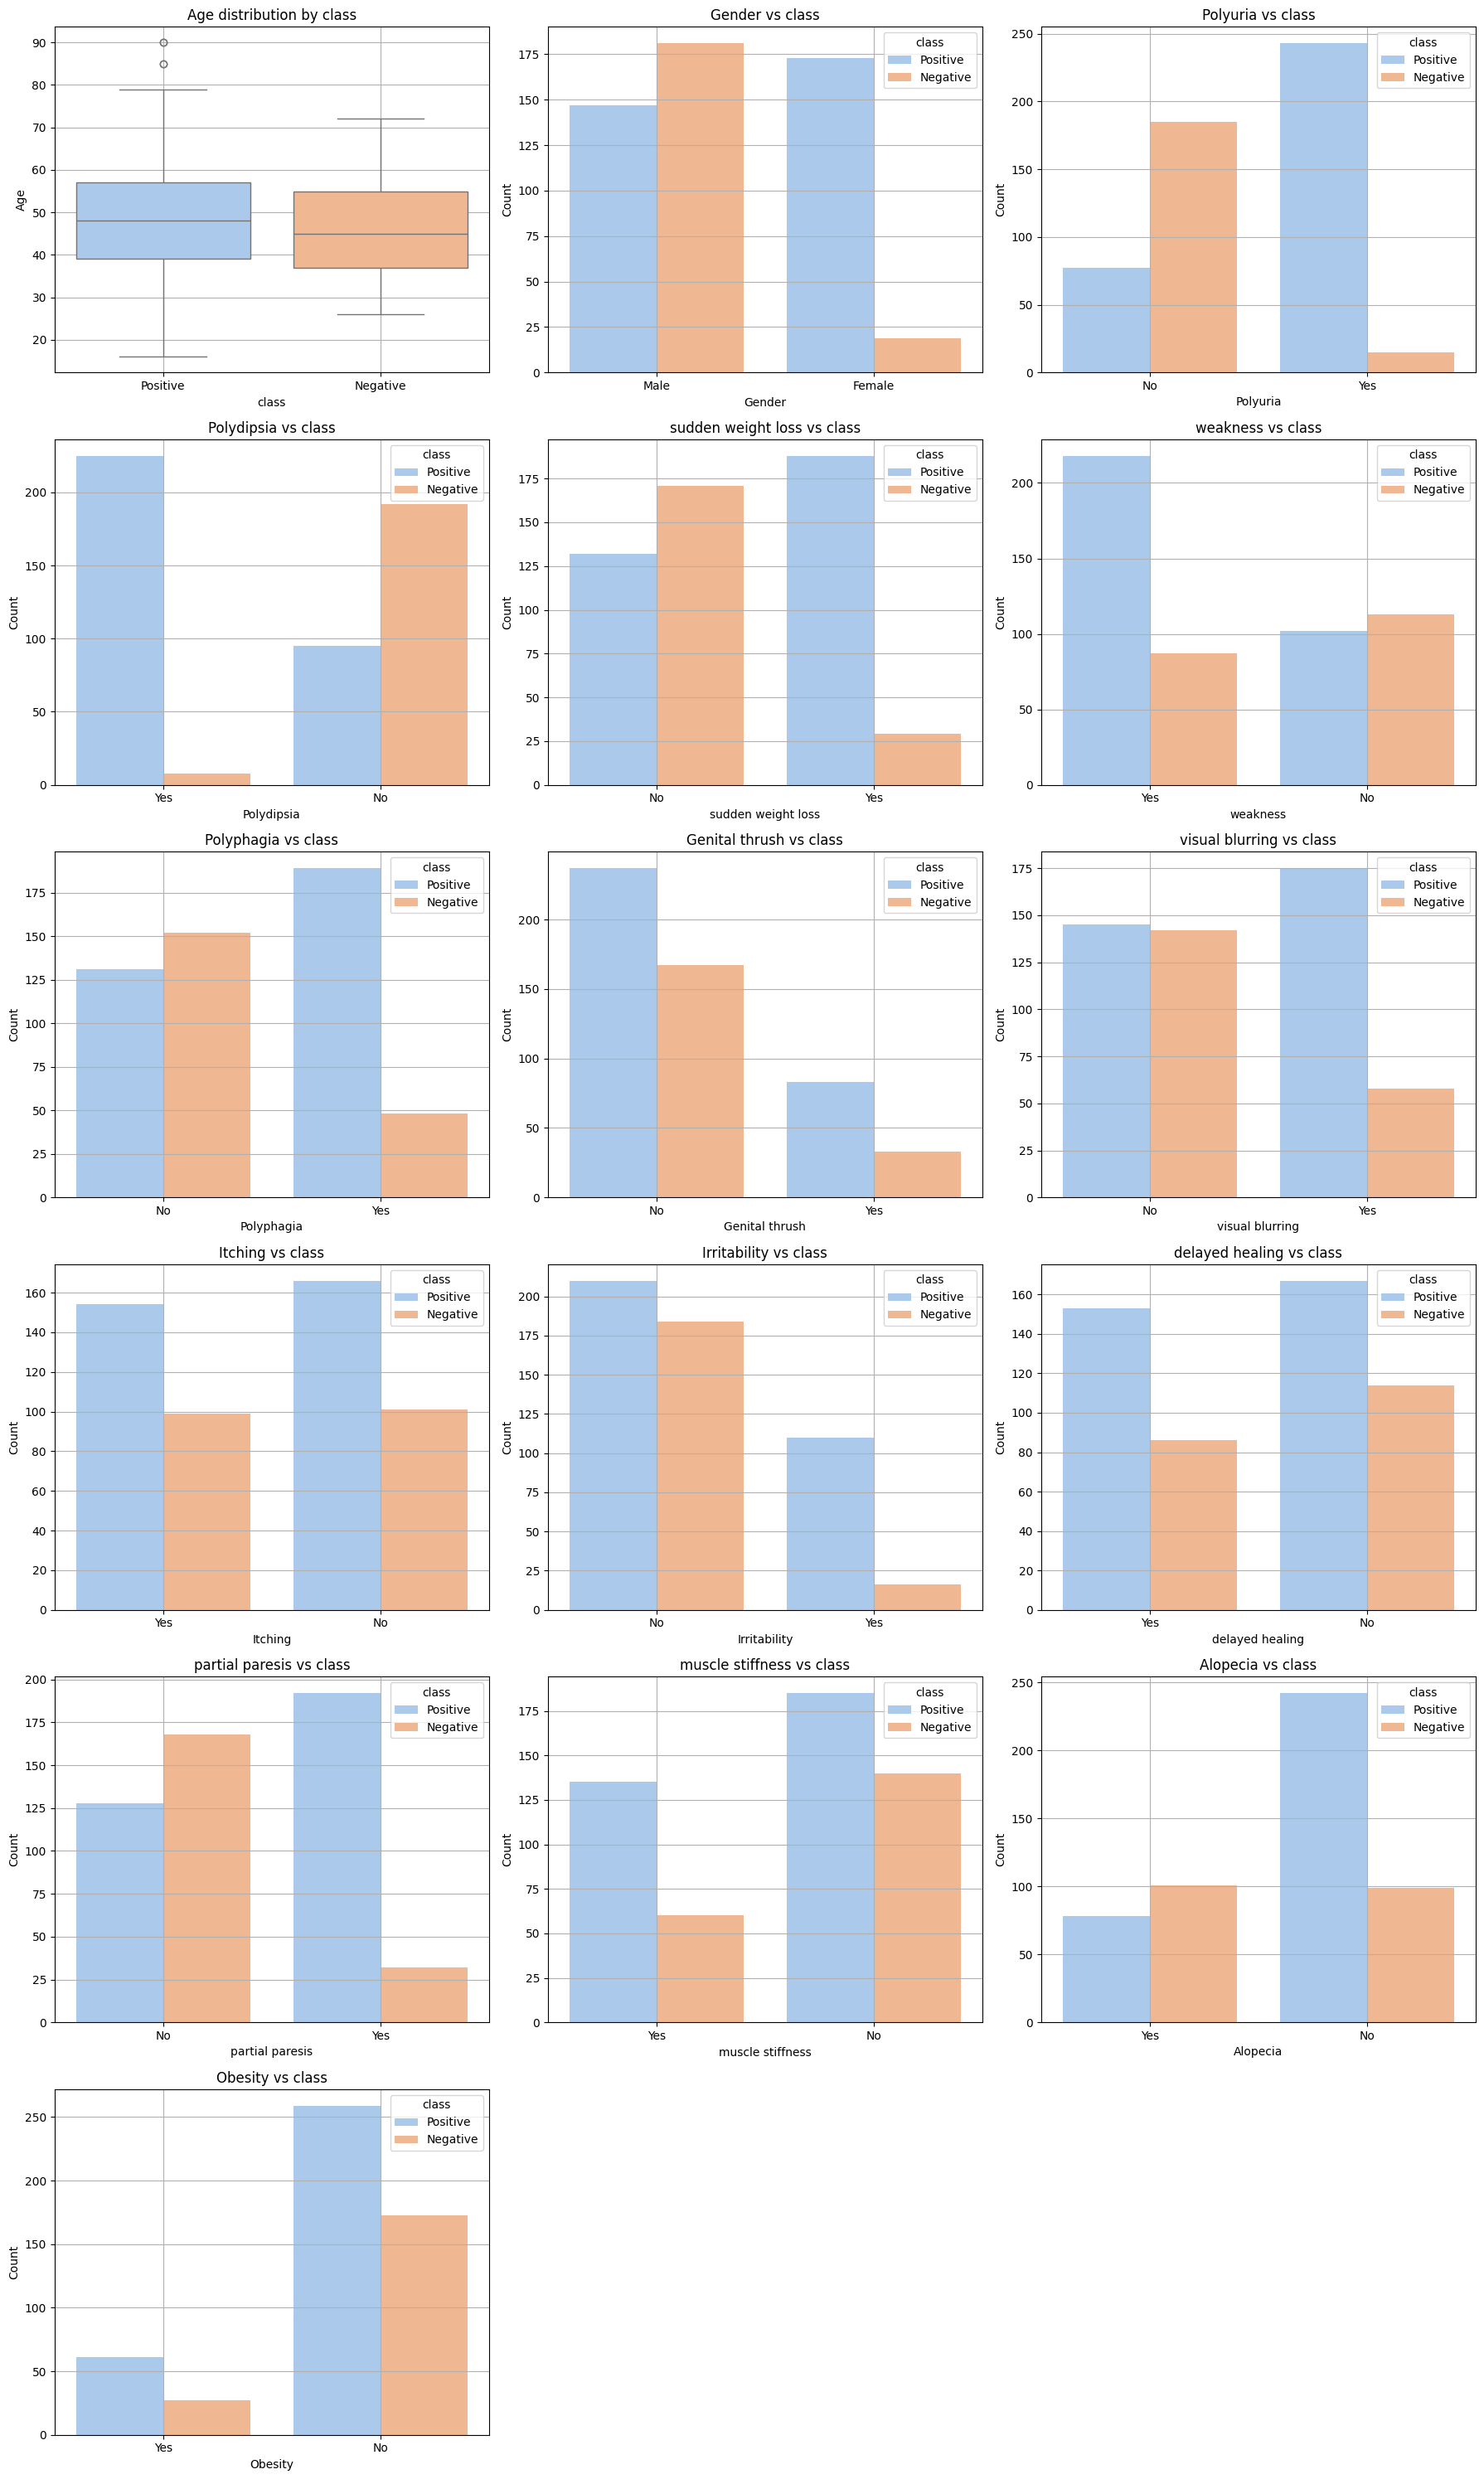

In [9]:
# Define the target variable
target_variable = 'class'

# Define a function to plot bivariate analysis for each feature
def plot_bivariate_analysis(data, column, target, ax):
    if data[column].dtype == 'object':
        # If the column is categorical, plot a count plot
        sns.countplot(x=column, hue=target, data=data, palette='pastel', ax=ax)
        ax.set_title(f'{column} vs {target}')
        ax.set_xlabel(column)
        ax.set_ylabel('Count')
        ax.legend(title=target)
    else:
        # If the column is numerical, plot a box plot
        sns.boxplot(x=target, hue=target, y=column, data=data, palette='pastel', ax=ax)
        ax.set_title(f'{column} distribution by {target}')
        ax.set_xlabel(target)
        ax.set_ylabel(column)
    ax.grid(True)

# Calculate the number of features to determine subplot layout
num_features = len(data.columns) - 1  # Excluding the target variable

# Calculate the number of rows and columns for subplots
num_rows = (num_features + 2) // 3  # Add 2 to round up to the nearest integer
num_cols = min(num_features, 3)

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(18, 5*num_rows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate over each column in the dataframe and plot bivariate analysis
for i, column in enumerate(data.columns):
    if column != target_variable:
        plot_bivariate_analysis(data, column, target_variable, axes[i])

# Hide empty subplots
for j in range(num_features, num_rows * num_cols):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

from the visualization above we can see that the factors that most influence diabetes are **Polyuria**, **Polydipsia**, and followed by **sudden weight loss**, **weakness**, and **partial paresis**

### Correlation Analysis

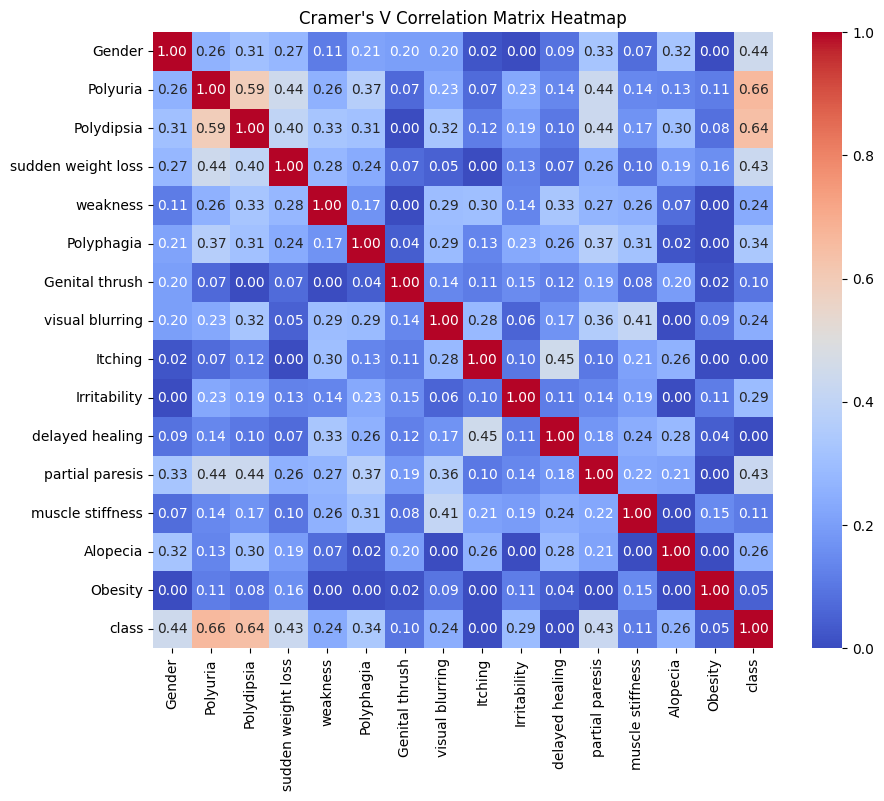

In [10]:
from scipy.stats import chi2_contingency
         
def cramers_v(x, y):
    """Calculate Cramer's V for categorical-categorical association."""
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1)) / (n-1))
    rcorr = r - ((r-1)**2) / (n-1)
    kcorr = k - ((k-1)**2) / (n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Select only categorical columns
categorical_data = data.select_dtypes(include=['object'])

# Compute Cramer's V for all pairs of categorical variables
corr_matrix = pd.DataFrame(index=categorical_data.columns, columns=categorical_data.columns)
for col1 in categorical_data.columns:
    for col2 in categorical_data.columns:
        if col1 != col2:
            corr_matrix.loc[col1, col2] = cramers_v(categorical_data[col1], categorical_data[col2])

# Fill diagonal with 1s (perfect correlation)
np.fill_diagonal(corr_matrix.values, 1)

# Convert correlation matrix values to float
corr_matrix = corr_matrix.astype(float)

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title("Cramer's V Correlation Matrix Heatmap")
plt.show()

according to viz above, polyuria and polydipsia has a stronger association

## Machine Learning Model

#### Change categorical into numerical variables

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

In [12]:
data['Gender'].replace({'Male':1,'Female':0},inplace=True)
data['Polyuria'].replace({'Yes':1,'No':0},inplace=True)
data['Polydipsia'].replace({'Yes':1,'No':0},inplace=True)
data['sudden weight loss'].replace({'Yes':1,'No':0},inplace=True)
data['weakness'].replace({'Yes':1,'No':0},inplace=True)
data['Polyphagia'].replace({'Yes':1,'No':0},inplace=True)
data['Genital thrush'].replace({'Yes':1,'No':0},inplace=True)
data['visual blurring'].replace({'Yes':1,'No':0},inplace=True)
data['Itching'].replace({'Yes':1,'No':0},inplace=True)
data['Irritability'].replace({'Yes':1,'No':0},inplace=True)
data['delayed healing'].replace({'Yes':1,'No':0},inplace=True)
data['partial paresis'].replace({'Yes':1,'No':0},inplace=True)
data['muscle stiffness'].replace({'Yes':1,'No':0},inplace=True)
data['Alopecia'].replace({'Yes':1,'No':0},inplace=True)
data['Obesity'].replace({'Yes':1,'No':0},inplace=True)
data['class'].replace({'Positive':1,'Negative':0},inplace=True)

data.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


In [13]:
# Generate new column names
new_columns = [col.lower().replace(' ', '_') for col in data.columns]

# Rename columns
data.rename(columns=dict(zip(data.columns, new_columns)), inplace=True)

data.head()

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


#### Modelling using XGBoost

Accuracy: 0.9807692307692307

Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        33
           1       1.00      0.97      0.99        71

    accuracy                           0.98       104
   macro avg       0.97      0.99      0.98       104
weighted avg       0.98      0.98      0.98       104



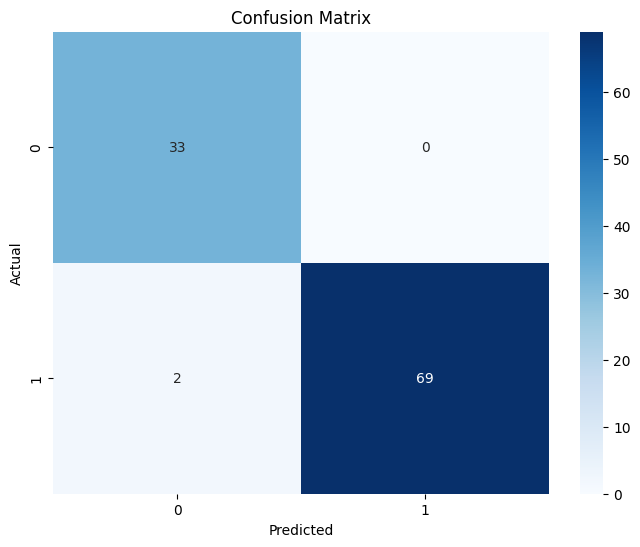

In [14]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Split the dataset into features (X) and target variable (y)
X = data.drop('class', axis=1)
y = data['class']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the XGBoost classifier
model = XGBClassifier()
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#### Export pickle file

In [15]:
import pickle

In [16]:
pickle.dump(model,open('model.pkl','wb'))
model = pickle.load(open('model.pkl','rb'))